# Deep Learning
What Makes Deep Learning Different?

Imagine you’re trying to teach someone to recognize apples and oranges. Traditional machine learning works by giving that person specific rules: "If it’s round and red, it’s an apple." Deep learning, on the other hand, teaches them by showing many examples and letting them figure out the patterns themselves.

Machine Learning: Requires manual rules for pattern recognition.

Deep Learning: Learns rules automatically from data.

Analogy: Imagine teaching someone to drive. Instead of explaining every rule, you sit beside them as they practice until they can handle situations themselves.

![Deep Learning](https://cdn.prod.website-files.com/5fb24a974499e90dae242d98/60f6fcbbeb0b8f57a7980a98_5f213db7c7763a9288759ad1_5eac2d0ef117c236e34cc0ff_DeepLearning.jpeg)


## Neural network 

A neural network is like a decision-making machine made of tiny units called neurons. Each neuron takes some input, does a simple calculation, and passes the result to the next neuron.

Think of it like a relay race:

The input layer is the starting point (it receives the data).

The hidden layers are where the baton is passed between runners (neurons) that process the data.

The output layer is the finish line (it gives the prediction).

## Neuron
Think of a neuron as a smart information processor:

### Inputs: Takes in multiple signals (like temperature, wind speed)

Processing: Weighs each input differently (like giving more importance to temperature)

Activation: Decides whether to "fire" based on the total weighted input

Output: Produces a signal that can be used by other neurons

### Scenario: Predicting energy production based on weather.

#### Step 1: Input Layer

The input layer receives data like the time of day, temperature, cloud cover, and wind speed.

#### Step 2: First Hidden Layer

Each neuron in this layer takes the data, applies weights, adds a bias, and then decides using an activation function.

Example: A neuron might get an input of 15 (temperature). After the math, it passes 5 to the next layer.

#### Step 3: Second Hidden Layer

Neurons in this layer combine the results from the previous layer.

Example: One neuron might combine inputs from "time of day" and "wind speed" to predict how energy production changes in the evening.

#### Step 4: Output Layer

This layer gives the final prediction. In our case, it might predict that energy production will be 50 units at 3 PM.

## How Neural Networks Learn 

Imagine training for a relay race:

#### Forward Pass (Practice Run):

The team runs the race and finishes.

The coach checks how close they came to the goal.

Loss Function (Measuring Mistakes):

This is like the coach saying, "You were 10 seconds slower than the goal."

#### Backward Pass (Adjusting Strategy):

The coach gives feedback to the runners.

Example: "Runner 2, you need to speed up! Runner 3, slow down a bit."

In neural networks, this is called backpropagation. The network adjusts weights (importance) and bias (starting point) until the predictions improve.

## Why Deep Learning Works Better for our Data:

The energy production has complex patterns:

Daily cycles (time_of_day)
Temperature thresholds
Cloud cover plateaus
Wind speed optimal ranges
Interactions between variables

A deep neural network can:

First layer: Learn basic patterns (day/night cycles)
Middle layers: Understand interactions (temperature × wind speed)
Deep layers: Capture complex relationships (optimal conditions)

## Neural networks as it works

## Understanding neural networks - one layer at a time

In [1]:
import torch

# Example input: 1 sample with 4 features (time, temperature, cloud cover, wind speed)
inputs = torch.tensor([[12.0, 20.0, 40.0, 10.0]], dtype=torch.float32)

### Fully connected layer
We construct a fully connected layer first. A fully connected (FC) layer means that every neuron in the layer is connected to every neuron in the previous layer. The first layer is connected to every neuron in input layer


4: The input size—the number of features in the input data
16: The output size


#### Example of Fully Connected (FC) Layer

Suppose you have an FC layer `nn.Linear(3, 2)`:

- **Input:** 3 features ($x_{1}$, $x_{2}$, $x_{3}$).
- **Output:** 2 neurons ($y_{1}$, $y_{2}$).

The output is computed as:

$y_{1} = w_{11}x_{1} + w_{12}x_{2} + w_{13}x_{3} + b_{1}$

$y_{2} = w_{21}x_{1} + w_{22}x_{2} + w_{23}x_{3} + b_{2}$


In [6]:
import torch.nn as nn

# Define a layer with 4 inputs (features) and 16 neurons (units)
fc1 = nn.Linear(4, 16)
layer1_output = fc1(inputs)
#This layer transforms the data into 16 new values (one for each neuron).
print("Output after the first linear layer:", layer1_output.shape)

Output after the first linear layer: torch.Size([1, 16])


In [ ]:
activation = nn.ReLU()
activated_output = activation(layer1_output)
# The activation ensures that neurons only pass meaningful signals.
print("Output after applying ReLU:", activated_output)

### Neuron
This is a good time to introduce the concept of Neuron. Each neuron in neural network is analagous to an actual neuron in our brain. 

The neuron takes input from multiple neurons and produces an activation which is passed on to other neurons in the brain till they take a decision. 

![Neuron Network Diagram](https://media.licdn.com/dms/image/v2/D5612AQHJncf_MoG1ig/article-inline_image-shrink_1500_2232/article-inline_image-shrink_1500_2232/0/1659619399965?e=1742428800&v=beta&t=mUIs-Xa65knFb2p2brkKGIAWuNOLOFABurUt-dtSKz8)


In [ ]:
# Second hidden layer with 16 inputs and 8 neurons
fc2 = nn.Linear(16, 8)
layer2_output = fc2(activated_output)
activated_output2 = activation(layer2_output)
print("Output after the second hidden layer:", activated_output2)

In [9]:
# Output layer: 8 inputs and 1 output (final prediction)
fc3 = nn.Linear(8, 1)
final_output = fc3(activated_output2)
print("Final prediction:", final_output)

Final prediction: tensor([[-0.0438]], grad_fn=<AddmmBackward0>)


In [29]:
# Putting it all together
class SimpleEnergyModel(nn.Module):
    def __init__(self):
        super(SimpleEnergyModel, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # First hidden layer
        self.fc2 = nn.Linear(16, 8)  # Second hidden layer
        self.fc3 = nn.Linear(8, 1)  # Output layer
        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = SimpleEnergyModel()

How Training Works

To make the network learn:

Forward Pass: Pass the input data through the layers.

Loss Calculation: Measure how far the prediction is from the true value.

Backward Pass: Adjust the weights and biases using feedback (gradients).

First lets load and prepare the data

In [26]:
import pandas as pd
data = pd.read_csv('energy_production_dataset.csv')
X = torch.tensor(data[['time_of_day', 'temperature', 'cloud_cover', 'wind_speed']].values, dtype=torch.float32)
y = torch.tensor(data['energy_production'].values,dtype=torch.float32).reshape(-1, 1)


In [42]:
from sklearn.preprocessing import StandardScaler
# Scale both features AND targets
scaler_X = StandardScaler()
scaler_y = StandardScaler()

feature_columns = ['time_of_day', 'temperature', 'cloud_cover', 'wind_speed']
X_scaled = scaler_X.fit_transform(data[feature_columns])
y_scaled = scaler_y.fit_transform(data[['energy_production']])

X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y_scaled, dtype=torch.float32)


In [43]:
# Step 4: Initialize the model
model = SimpleEnergyModel()

# Step 5: Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Using the same optimizer as in your notebook


In [44]:
# Step 6: Training loop
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)
    
    # Calculate loss
    loss = loss_fn(predictions, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights
    
    # Store loss
    losses.append(loss.item())
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.9618
Epoch [20/100], Loss: 0.9047
Epoch [30/100], Loss: 0.8594
Epoch [40/100], Loss: 0.8203
Epoch [50/100], Loss: 0.7844
Epoch [60/100], Loss: 0.7499
Epoch [70/100], Loss: 0.7161
Epoch [80/100], Loss: 0.6828
Epoch [90/100], Loss: 0.6505
Epoch [100/100], Loss: 0.6195


Now lets look at the training progress

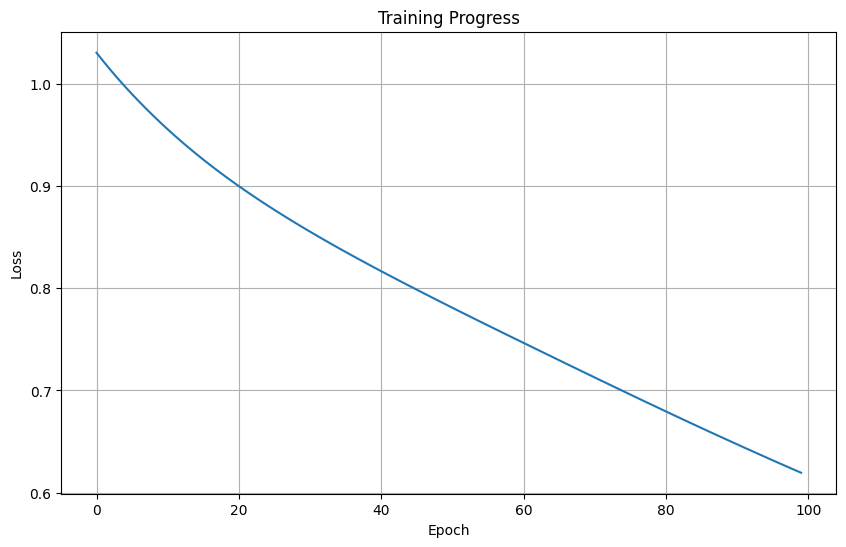

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [48]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    test_input_raw = [[12.0, 20.0, 40.0, 10.0]]
    test_input_scaled = scaler_X.transform(test_input_raw)
    test_input = torch.tensor(test_input_scaled, dtype=torch.float32)
    
    # Make prediction and inverse transform to original scale
    prediction_scaled = model(test_input)
    prediction_original = scaler_y.inverse_transform(prediction_scaled.numpy())
    
    print(f"\nTest prediction for input {test_input_raw[0]}: {prediction_original[0][0]:.2f}")



Test prediction for input [12.0, 20.0, 40.0, 10.0]: 18.99


/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
# Sample of actual vs  predicted values
with torch.no_grad():
    # Get predictions for first few samples
    sample_X = X[:5]
    sample_predictions_scaled = model(sample_X)
    sample_predictions = scaler_y.inverse_transform(sample_predictions_scaled.numpy())
    sample_actual = scaler_y.inverse_transform(y[:5].numpy())
    
    print("\nSample predictions vs actual values:")
    for i in range(5):
        print(f"Predicted: {sample_predictions[i][0]:.2f}, Actual: {sample_actual[i][0]:.2f}")


Sample predictions vs actual values:
Predicted: 24.87, Actual: 44.48
Predicted: 11.22, Actual: 4.68
Predicted: 5.25, Actual: -0.00
Predicted: 9.84, Actual: 2.73
Predicted: 10.07, Actual: 1.27
